In [4]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns
import numpy as np

In [5]:
# scenario
labels = []
snf_paths = []
nc_paths = []

In [6]:
# labels.append(r"3.5 $\frac{€}{t\ km}$")
labels.append("1 CISF")
snf_paths.append("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_1cisf/snf_stored.csv")
nc_paths.append("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_1cisf/nc_stored.csv")

In [7]:
# labels.append(r"7 $\frac{€}{t\ km}$")
labels.append("3 CISF")

snf_paths.append("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_3cisf/snf_stored.csv")
nc_paths.append("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_3cisf/nc_stored.csv")

In [8]:
# labels.append(r"14 $\frac{€}{t\ km}$")
labels.append("5 CISF")

snf_paths.append("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_5cisf/snf_stored.csv")
nc_paths.append("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_5cisf/nc_stored.csv")

In [9]:
snf_init = pd.read_excel("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/ExtendedNuclearData.xlsx", sheet_name="Reactors")
snf_init

,name,snf,capacity,costs
0,Ahaus,56,370,2000
1,Brokdorf,50,100,2000
2,Gorleben,113,420,2000
3,Brunsbüttel,24,20,2000
4,Biblis,108,135,2000
5,Grafenrheinfeld,54,88,2000
6,Grohnde,51,100,2000
7,Grundemmingen,127,192,2000
8,Isar,88,152,2000
9,Lingen,47,125,2000


In [10]:
# coords
isf_coords = {"Gorleben": (53.033344625111255, 11.341597461918763),
              "Ahaus": (52.075884172859716, 7.056252098203471),
              "Brokdorf": (53.85053568702555, 9.345557443628627),
              "Brunsbüttel": (53.891632640377, 9.20050890913132),
              "Biblis": (49.70830596704328, 8.411540078513102),
              "Grafenrheinfeld": (49.98379398601132, 10.1866276073602),
              "Grohnde": (52.03567047221345, 9.41068601909146),
              "Grundemmingen": (48.51666979391695, 10.403076045930131),
              "Isar": (48.6075745368956, 12.291958334289768),
              "Lingen": (52.47033938642687, 7.321564619110349),
              "Krümmel": (53.410146129098514, 10.410102309356501),
              "Neckarwestheim": (49.0420294948931, 9.173420061294042),
              "Philippsburg": (49.25285028023963, 8.441867563151883),
              "Unterweser": (53.430121612826966, 8.476324972847728),
              "Lubmin": (54.14141668772474, 13.677069821066244)}

cisf_names = ['Oberdachstetten', 'Kaiseresch', 'Stade', 'Hann. Münden', 'Crivitz', 'Gardelegen', 'Arnstadt', 'Kuchen']
cisf_coords = [(49.41887922, 10.42371430), (50.22679584,7.13714757), (53.59721036,9.45195604), 
(51.41175438, 9.65999936), (53.57227292, 11.64393809), (52.51810692, 11.40461218), (50.83101325, 10.95047937), (48.64054772, 9.802936604)]
cisf_coords = {k:v for k, v in zip(cisf_names, cisf_coords)}
cisf_coords['Gorleben_CISF'] = isf_coords['Gorleben']
cisf_coords['Ahaus_CISF'] = isf_coords['Ahaus']

fsf_coords = {"Saldenberg": (48.77298963391,13.35212619416),
              "Gorleben_Endlager": (53.033344625111255, 11.341597461918763),
              "Messel": (49.93831226, 8.749268672)}
coords = isf_coords | cisf_coords | fsf_coords

row_list = []
for n, c in coords.items():
    d = {}
    d["name"] = n
    d["latitude"] = c[0]
    d["longitude"] = c[1]
    row_list.append(d)

coords_df = pd.DataFrame(row_list)

geometry = [Point(xy) for xy in zip(coords_df['longitude'], coords_df['latitude'])]
gdf = GeoDataFrame(coords_df, geometry=geometry)
ger = gpd.read_file("/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/vg2500_geo84/vg2500_krs.shp")

In [13]:
marker_sizes = []
cisf_list = []
for snf_path, nc_path in zip(snf_paths, nc_paths):
    snf_stored = pd.read_csv(snf_path)
    nc_stored = pd.read_csv(nc_path)
    init_values = []
    for row in snf_init.iterrows():
        init_values.append({"node": row[1]["name"],
                        "year": 2029,
                        "SNF": row[1]["snf"]})
    snf_stored = pd.concat([snf_stored, pd.DataFrame(init_values)], ignore_index=True)

    snf_sizes = [snf_stored[(snf_stored.year == 2050) & (snf_stored.node == n)]["SNF"].values[0] if n in snf_stored.node.unique() else 0 for n in coords.keys()]
    nc_sizes = [nc_stored[(nc_stored.year == 2050) & (nc_stored.node == n)]["NC"].values[0] if n in nc_stored.node.unique() else 0 for n in coords.keys()]
    marker_sizes.append([x+y for x,y in zip(snf_sizes, nc_sizes)])

    cisf_list.append(nc_stored[(nc_stored.year == 2099) & (nc_stored.NC > 0)].node)

([<matplotlib.collections.PathCollection object at 0x12bef8230>, <matplotlib.collections.PathCollection object at 0x12c3a3b60>], ['ISF', 'CISF'])


/var/folders/cf/q39s0xxj5jnffczbkhswcymr0000gn/T/ipykernel_11761/1846618279.py:26: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  print(axs[0].get_legend_handles_labels())
/var/folders/cf/q39s0xxj5jnffczbkhswcymr0000gn/T/ipykernel_11761/1846618279.py:29: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.figlegend(axs[-1].get_legend_handles_labels()[0], axs[-1].get_legend_handles_labels()[1], bbox_to_anchor=(0.5, 0.25), loc="upper center", ncol=3)


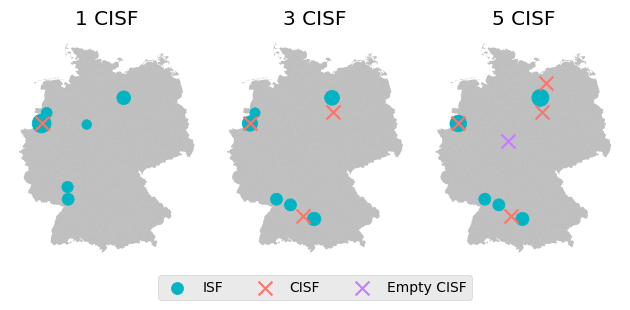

In [15]:
#plt.rcParams['text.usetex'] = True
fig, axs = plt.subplots(1,3)

# ger.plot(color="black", alpha=0.25, label="ISF", ax=axs[1])
# ger.plot(color="black", alpha=0.25, label="ISF", ax=axs[2])

# markersize=[20 if x > 0 else 0 for x in m ]
i = 0
colors = ["#F8766D", "#00B4C4", "#7CAE00"]
plt.style.use("ggplot")

#colors = merged.node.unique()
for m, l, c, cisf in zip(marker_sizes, labels, colors, cisf_list):
    ger.plot(color="black", alpha=0.25, label="ISF", ax=axs[i])
    gdf[gdf.name.isin(coords.keys())].plot(aspect=1.4, ax=axs[i], 
        markersize=[x/2 for x in m], label="ISF", c=colors[1])
    gdf[gdf.name.isin(cisf)].plot(aspect=1.4, ax=axs[i], 
        markersize=100, label="CISF", c=colors[0], marker="x")
    if l == "5 CISF":
        gdf[gdf.name == "Hann. Münden"].plot(aspect=1.4, ax=axs[i], 
        markersize=100, label="Empty CISF", c="#C77CFF", marker="x")
    axs[i].set_axis_off()
    axs[i].set_title(l)
    i += 1
    
print(axs[0].get_legend_handles_labels())
#fig.suptitle("Locations of remaining interim storages in 2050")
plt.tight_layout()
plt.figlegend(axs[-1].get_legend_handles_labels()[0], axs[-1].get_legend_handles_labels()[1], bbox_to_anchor=(0.5, 0.25), loc="upper center", ncol=3)
plt.savefig("waste_distribution_250-fix_cisf.png")

plt.show()
#plt.savefig(f"/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/03-28/{fs}-34.png")

In [257]:
paths = ["/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_1cisf/yearly_costs.csv",#
         "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_3cisf/yearly_costs.csv",
         "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_5cisf/yearly_costs.csv"]
paths = ["/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor50/yearly_costs.csv",#
         "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor100/yearly_costs.csv",
         "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor200/yearly_costs.csv"]
yc_aggs = []
for path in paths:

    yearly_costs = pd.read_csv(path)
    yearly_costs.drop(columns="year").sum()
    yc_aggs.append(yearly_costs.drop(columns="year").sum())

In [258]:
yc_aggs[0].reset_index().rename(columns={"index": "factor", 0:"value (€)"})

,factor,value (€)
0,transport,1341421109
1,reactor,2439436253
2,hc,140268
3,cisf,3011705112
4,reactor_fix,25476383
5,cisf_fix,40383515
6,cisf_investment,744117829


In [259]:
yc_df_l = []
for x, l in zip(yc_aggs, labels):
    yc = x.reset_index().rename(columns={"index": "factor", 0:"value (€)"})
    yc["#CISF"] = l
    yc_df_l.append(yc)

In [260]:
yc_df = pd.concat(yc_df_l, ignore_index=True)
yc_df.head()

,factor,value (€),#CISF
0,transport,1341421109,1 CISF
1,reactor,2439436253,1 CISF
2,hc,140268,1 CISF
3,cisf,3011705112,1 CISF
4,reactor_fix,25476383,1 CISF


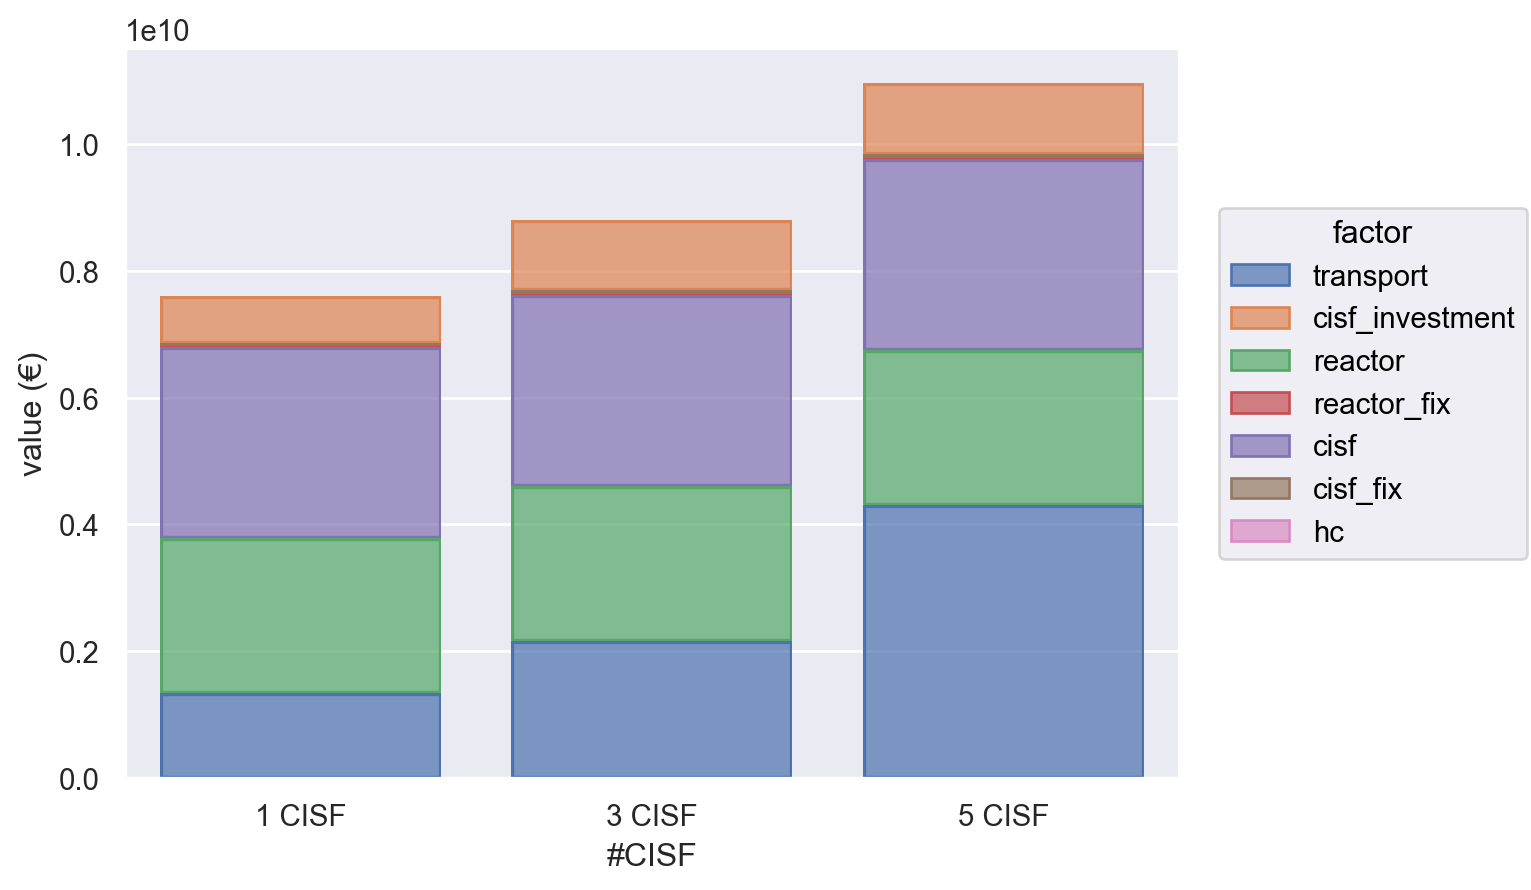

In [262]:
import seaborn.objects as so
(
    so.Plot(yc_df, x="#CISF", color="factor", y="value (€)")
    .add(so.Bar(), so.Stack())
    .scale(color=so.Nominal(order=["transport", "cisf_investment", "reactor", "reactor_fix", "cisf", "cisf_fix", "hc"]))
)

In [143]:
yearly_costs = yearly_costs.set_index("year")
yearly_costs

NameError: name 'yearly_costs' is not defined

In [144]:
plt.bar(x=yearly_costs.index, height=yearly_costs.sum(axis=1))

NameError: name 'yearly_costs' is not defined

In [145]:
plt.bar(x=yearly_costs.columns, height=yearly_costs.sum())

NameError: name 'yearly_costs' is not defined

In [146]:
plt.style.use("ggplot")
yearly_costs.drop(columns="cisf_investment").plot.line()
plt.ylabel("cost in 100 Mio €")

NameError: name 'yearly_costs' is not defined

In [ ]:
yearly_costs = yearly_costs.stack().reset_index()
yearly_costs.rename(columns={"level_1": "cost_factor", 0: "value"}, inplace=True)

In [ ]:
yearly_costs

,year,cost_factor,value
0,2030,transport,22863379
1,2030,reactor,75882100
2,2030,hc,3900
3,2030,cisf,0
4,2030,reactor_fix,1100000
...,...,...,...
485,2099,hc,0
486,2099,cisf,116664263
487,2099,reactor_fix,0
488,2099,cisf_fix,2306162


In [ ]:
sns.lineplot(yearly_costs.drop(columns=["cisf_investment"]), x="year", y="value", hue="cost_factor")

KeyError: "['cisf_investment'] not found in axis"

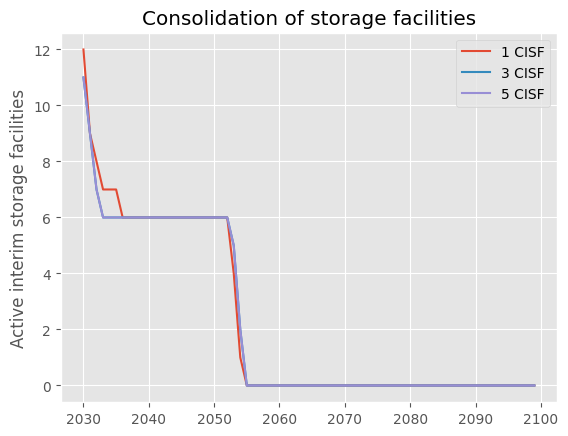

In [ ]:
facility_1 = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_1cisf/yearly_costs.csv"
facility_3 = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_3cisf/yearly_costs.csv"
facility_5 = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor5_3cisf/yearly_costs.csv"

yearly_costs_1 = pd.read_csv(facility_1, index_col="year")
yearly_costs_3 = pd.read_csv(facility_3, index_col="year")
yearly_costs_5 = pd.read_csv(facility_5, index_col="year")

y_1 = np.round(yearly_costs_1["reactor_fix"] / 1.03**(yearly_costs_1.index - 2030) / 100000, 0).astype(int)
y_3 = np.round(yearly_costs_3["reactor_fix"] / 1.03**(yearly_costs_3.index - 2030) / 100000, 0).astype(int)
y_5 = np.round(yearly_costs_5["reactor_fix"] / 1.03**(yearly_costs_5.index - 2030) / 100000, 0).astype(int)

plt.plot(y_1.index, y_1, label="1 CISF")
plt.plot(y_3.index, y_3, label="3 CISF")
plt.plot(y_5.index, y_5, label= "5 CISF")
# plot = np.round(yearly_costs_1["reactor_fix"] / 1.03**(yearly_costs_1.index - 2030) / 100000, 0).astype(int).plot.line(label="1 CISF")
# np.round(yearly_costs_3["reactor_fix"] / 1.03**(yearly_costs_3.index - 2030) / 100000, 0).astype(int).plot.line(label="3 CISF", ax=plot)
# np.round(yearly_costs_5["reactor_fix"] / 1.03**(yearly_costs_5.index - 2030) / 100000, 0).astype(int).plot.line(label="5 CISF", ax=plot)

plt.title("Consolidation of storage facilities")
plt.ylabel("Active interim storage facilities")

# for n, tick in enumerate(plot.axes.get_xticklabels()):
#     if n % 5 != 0:
#         tick.set_visible(False)
# plt.xticks(rotation=45, ha='right')
plt.legend()
plt.show()
#plt.setp(plot.axes.get_xticklabels()[::5], visible=True)


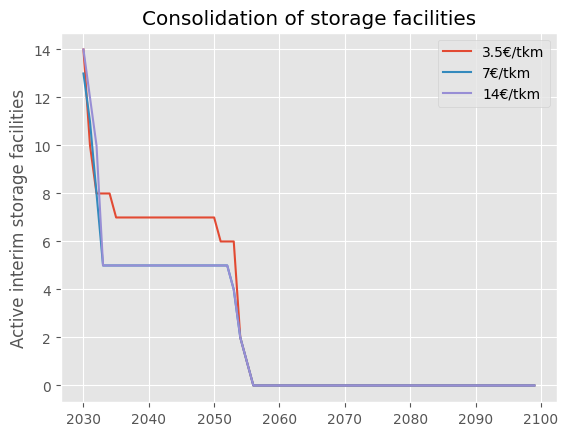

In [ ]:
facility_1 = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor50/yearly_costs.csv"
facility_3 = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor100/yearly_costs.csv"
facility_5 = "/Users/simonirmer/Documents/Privat/Uni/Berlin/WS23-24/OR-INF/term_paper/operations_oppenheimer/data/output_data/3-29/factor200/yearly_costs.csv"

yearly_costs_1 = pd.read_csv(facility_1, index_col="year")
yearly_costs_3 = pd.read_csv(facility_3, index_col="year")
yearly_costs_5 = pd.read_csv(facility_5, index_col="year")

y_1 = np.round(yearly_costs_1["reactor_fix"] / 1.03**(yearly_costs_1.index - 2030) / 100000, 0).astype(int)
y_3 = np.round(yearly_costs_3["reactor_fix"] / 1.03**(yearly_costs_3.index - 2030) / 100000, 0).astype(int)
y_5 = np.round(yearly_costs_5["reactor_fix"] / 1.03**(yearly_costs_5.index - 2030) / 100000, 0).astype(int)

plt.plot(y_1.index, y_1, label="3.5€/tkm")
plt.plot(y_3.index, y_3, label="7€/tkm")
plt.plot(y_5.index, y_5, label= "14€/tkm")

plt.title("Consolidation of storage facilities")
plt.ylabel("Active interim storage facilities")


plt.legend()
plt.show()

In [126]:
merged

year
2029    84
2074    84
2080    84
2079    84
2078    84
        ..
2052    84
2051    84
2050    84
2049    84
2099    84
Name: count, Length: 71, dtype: int64

In [147]:
snf_list = []
nc_list = []
for snf, nc, l in zip(snf_paths, nc_paths, labels):
    snf_stored = pd.read_csv(snf)
    nc_stored = pd.read_csv(nc)
    for node in snf_stored.node.unique():
        if snf_stored.node.value_counts()[node] < 71:
            snf_stored.loc[-1] = [node, 2029, 0]
            snf_stored.index = snf_stored.index + 1
            snf_stored = snf_stored.sort_index()
    snf_stored["transport_cost"] = l
    nc_stored["transport_cost"] = l
    snf_list.append(snf_stored)
    nc_list.append(nc_stored)

snf_stored = pd.concat(snf_list, ignore_index=True)
nc_stored = pd.concat(nc_list, ignore_index=True)

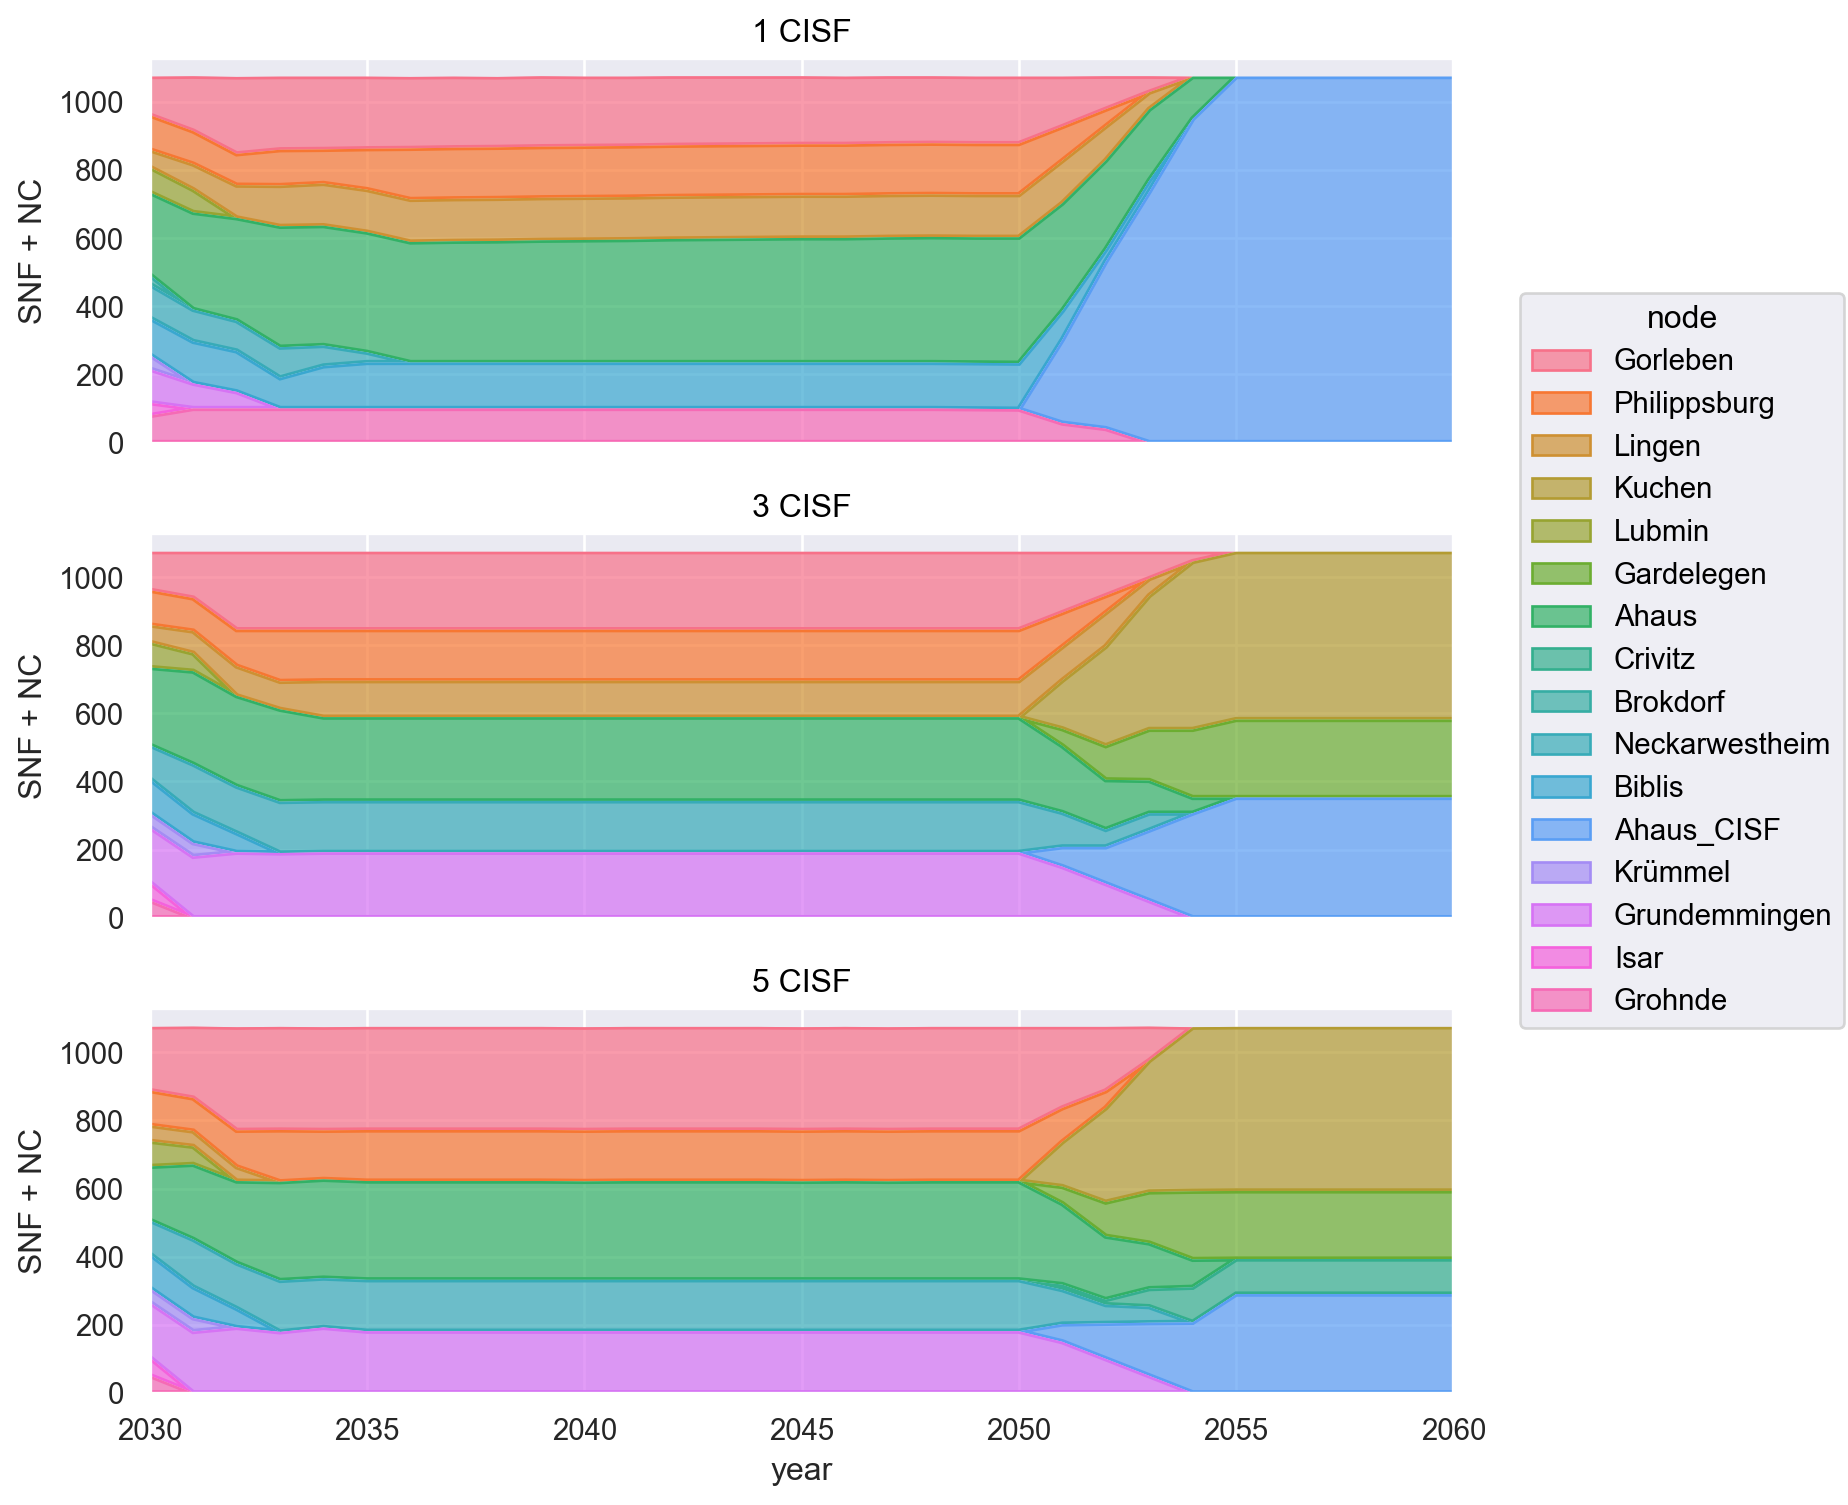

In [148]:
import seaborn.objects as so
merged = snf_stored.merge(nc_stored, on=["node", "year", "transport_cost"], how="left")
merged = merged.fillna(0)
merged["SNF + NC"] = merged.SNF + merged.NC
nonzero_merged = merged[merged['node'].isin(merged.loc[merged['SNF + NC'].ne(0), 'node'])]
#fig, ax = plt.subplots(1, 1)
so.Plot(nonzero_merged, "year", "SNF + NC", color="node").add(so.Area(alpha=0.7), so.Stack()).facet(row="transport_cost").layout(size=(8,8)).limit(x=(2030, 2060))
#plt.legend()
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
# sns.move_legend(ax, "upper center", bbox_to_anchor=(0.5, 1.15), 
#                 ncol=2)
#plt.show()

In [97]:
merged[merged.transport_costs == ]

<Axes: >

In [84]:
merged = snf_stored.merge(nc_stored, how="left")
merged = merged.fillna(0)
merged["TOTAL"] = merged.SNF + merged.NC
nonzero_merged = merged[merged['node'].isin(merged.loc[merged['TOTAL'].ne(0), 'node'])]

,node,year,SNF
1973,Ahaus,2029,56.0
1133,Ahaus,2030,170.0
1134,Ahaus,2031,226.0
1135,Ahaus,2032,292.0
1136,Ahaus,2033,304.0
...,...,...,...
428,Unterweser,2095,0.0
429,Unterweser,2096,0.0
430,Unterweser,2097,0.0
431,Unterweser,2098,0.0
